# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# [1]. Reading Data

## [1.1] Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it is easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score is above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [0]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               # Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=16lXcQBv5WlRaLUKNcjHqqyX2I-pXL7pH' # The shareable link # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

16lXcQBv5WlRaLUKNcjHqqyX2I-pXL7pH


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('realdata.csv')  
df3 = pd.read_csv('realdata.csv')

In [0]:
filtered_data=df3

In [0]:
# using SQLite Table to read data.
con = sqlite3.connect('database.sqlite') 

# filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
# SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000, will give top 500000 data points
# you can change the number to any other number based on your computing power

# filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000""", con) 
# for tsne assignment you can take 5k data points

filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 LIMIT 5000""", con) 

# Give reviews with Score>3 a positive rating(1), and reviews with a score<3 a negative rating(0).
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

In [0]:
display = pd.read_sql_query("""
SELECT UserId, ProductId, ProfileName, Time, Score, Text, COUNT(*)
FROM Reviews
GROUP BY UserId
HAVING COUNT(*)>1
""", con)

In [0]:
print(display.shape)
display.head()

In [0]:
display[display['UserId']=='AZY10LLTJ71NX']

In [0]:
display['COUNT(*)'].sum()

#  [2] Exploratory Data Analysis

## [2.1] Data Cleaning: Deduplication

It is observed (as shown in the table below) that the reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.  Following is an example:

In [0]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


As it can be seen above that same user has multiple reviews with same values for HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary and Text and on doing analysis it was found that <br>
<br> 
ProductId=B000HDOPZG was Loacker Quadratini Vanilla Wafer Cookies, 8.82-Ounce Packages (Pack of 8)<br>
<br> 
ProductId=B000HDL1RQ was Loacker Quadratini Lemon Wafer Cookies, 8.82-Ounce Packages (Pack of 8) and so on<br>

It was inferred after analysis that reviews with same parameters other than ProductId belonged to the same product just having different flavour or quantity. Hence in order to reduce redundancy it was decided to eliminate the rows having same parameters.<br>

The method used for the same was that we first sort the data according to ProductId and then just keep the first similar product review and delelte the others. for eg. in the above just the review for ProductId=B000HDL1RQ remains. This method ensures that there is only one representative for each product and deduplication without sorting would lead to possibility of different representatives still existing for the same product.

In [0]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [0]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(101945, 11)

In [0]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

100.0

<b>Observation:-</b> It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions

In [0]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", con)

display.head()

In [0]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [0]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(101945, 11)


positive    60650
negative    41295
Name: Score, dtype: int64

#  [3] Preprocessing

## [3.1].  Preprocessing Review Text

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

In [0]:
# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[4900]
print(sent_4900)
print("="*50)

In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.
This was a gift to a friend who shared it during entertaining.  She was delighted with the quality and selection.
I liked the lemon better than the almond ones. They bag is bigger than I expected.  Great munchies, lots of cookies.
We originally had the Purina One hairball for my rescued cat (per their recommendation), but he does have a sensitive tummy and would have really loose stools, and have them at least 4x's a day.  So I 

In [0]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_150 = re.sub(r"http\S+", "", sent_1500)
sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_0)

In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.


In [0]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4900, 'lxml')
text = soup.get_text()
print(text)

In JuneI saw a charming groupof roses all beginto droopI pepped them upwith chicken soup!Sprinkle oncesprinkle twicesprinkle chicken soupwith riceThis is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.
This was a gift to a friend who shared it during entertaining.  She was delighted with the quality and selection.
I liked the lemon better than the almond ones. They bag is bigger than I expected.  Great munchies, lots of cookies.
We originally had the Purina One hairball for my rescued cat (per their recommendation), but he does have a sensitive tummy and would have really loose stools, and have them at least 4x's a day.  So I switched to Sensitive Systems, and I LOVE it.  My cat had no probl

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent_1500 = decontracted(sent_1500)
print(sent_1500)
print("="*50)

I liked the lemon better than the almond ones. They bag is bigger than I expected.  Great munchies, lots of cookies.


In [0]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm.


In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

I liked the lemon better than the almond ones They bag is bigger than I expected Great munchies lots of cookies 


In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who','not','no', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 101945/101945 [01:02<00:00, 1630.17it/s]


<h2><font color='red'>[3.2] Preprocessing Review Summary</font></h2>

In [0]:
def func(x):
  if x=='positive':
    return 1
  else:
    return 0

In [0]:
x=preprocessed_reviews
y=final['Score'].apply(func)

In [0]:
from sklearn.model_selection import train_test_split
x1,xtest,y1,ytest=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [0]:
xtrain,xcv,ytrain,ycv=train_test_split(x1,y1,test_size=0.2,random_state=1)

In [0]:
print(len(xtrain))
print(ytrain.shape)
print(len(xtest))
print(ytest.shape)
print(len(xcv))
print(ycv.shape)

57088
(57088,)
30584
(30584,)
14273
(14273,)


# [4] Featurization

## [4.1] BAG OF WORDS

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
xtrainonehotencoding=count_vect.fit_transform(xtrain)
xtestonehotencoding=count_vect.transform(xtest)
xcvonehotencoding=count_vect.transform(xcv)
print(xtrainonehotencoding.shape)
print(xtestonehotencoding.shape)
print(xcvonehotencoding.shape)

(57088, 45065)
(30584, 45065)
(14273, 45065)


## [4.2] Bi-Grams and n-Grams.

In [0]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# you can choose these numebrs min_df=10, max_features=5000, of your choice

from sklearn.feature_extraction.text import CountVectorizer
count_vect1=CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
xtrainonehotencoding=count_vect1.fit_transform(xtrain)
xtestonehotencoding=count_vect1.transform(xtest)
xcvonehotencoding=count_vect1.transform(xcv)
print(xtrainonehotencoding.shape)
print(xtestonehotencoding.shape)
print(xcvonehotencoding.shape)

## [4.3] TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(min_df=2)
xtraintfidfencoding=tfidf.fit_transform(xtrain)
xtesttfidfencoding=tfidf.transform(xtest)
xcvtfidfencoding=tfidf.transform(xcv)
print(xtraintfidfencoding.shape)
print(xtesttfidfencoding.shape)
print(xcvtfidfencoding.shape)

(57088, 23142)
(30584, 23142)
(14273, 23142)


## [4.4] Word2Vec

In [0]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in xtrain:
    list_of_sentance.append(sentance.split())

In [0]:
# Using Google News Word2Vectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY
# you can comment this whole cell
# or change these varible according to your need

is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

[('fantastic', 0.849480926990509), ('terrific', 0.818476676940918), ('good', 0.8132082223892212), ('wonderful', 0.812318742275238), ('awesome', 0.8052883148193359), ('amazing', 0.787868082523346), ('perfect', 0.7628589272499084), ('excellent', 0.7627221345901489), ('incredible', 0.685796320438385), ('nice', 0.6765019297599792)]
[('nastiest', 0.8064655065536499), ('greatest', 0.8033692836761475), ('best', 0.7524702548980713), ('tastiest', 0.6948477625846863), ('disgusting', 0.6498489379882812), ('surpass', 0.6444903612136841), ('closest', 0.6229448318481445), ('terrible', 0.618537962436676), ('smoothest', 0.6092801690101624), ('superior', 0.6031782627105713)]


In [0]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  14224
sample words  ['went', 'online', 'research', 'dry', 'dog', 'foods', 'thought', 'course', 'star', 'food', 'know', 'tons', 'protein', 'always', 'best', 'every', 'breed', 'started', 'three', 'little', 'dogs', 'lbs', 'lb', 'yorkie', 'wellness', 'core', 'sure', 'wonderful', 'rated', 'turned', 'far', 'rich', 'talking', 'breeder', 'explained', 'much', 'breeds', 'liver', 'kidneys', 'saw', 'right', 'away', 'knew', 'make', 'quick', 'change', 'definately', 'wanted', 'eliminate', 'gas']


## [4.4.1] Converting text into vectors using Avg W2V, TFIDF-W2V

#### [4.4.1.1] Avg W2v

In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(xtrain): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(' '): # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 57088/57088 [02:52<00:00, 331.36it/s]

57088
50


In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectorstest = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(xtest): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(' '): # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorstest.append(sent_vec)
print(len(sent_vectorstest))
print(len(sent_vectorstest))

100%|██████████| 30584/30584 [01:34<00:00, 324.42it/s]

30584
30584


In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectorscv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(xcv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(' '): # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorscv.append(sent_vec)
print(len(sent_vectorscv))
print(len(sent_vectorscv))

100%|██████████| 14273/14273 [00:44<00:00, 321.05it/s]

14273
14273


#### [4.4.1.2] TFIDF weighted W2v

In [0]:
model = TfidfVectorizer()
xtraintfidfw2v = model.fit_transform(xtrain)
#xtesttfidfw2v=model.transform(xtest)
#xcvtfidfw2v=model.transform(xcv)
tfidf_feat = model.get_feature_names()
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [0]:
xcvtfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(xcv): # for each review/sentence 
    sent_vec = np.zeros(50)
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(' '): # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    xcvtfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 14273/14273 [08:31<00:00, 21.49it/s]


In [0]:
xtraintfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(xtrain): # for each review/sentence 
    sent_vec = np.zeros(50)
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(' '): # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    xtraintfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 57088/57088 [36:39<00:00, 25.95it/s]


In [0]:
xtesttfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(xtest): # for each review/sentence 
    sent_vec = np.zeros(50)
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(' '): # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    xtesttfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 30584/30584 [15:32<00:00, 32.81it/s]


# [5] Assignment 9: Random Forests

<ol>
    <li><strong>Apply Random Forests & GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider two hyperparameters: n_estimators & max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Get top 20 important features and represent them in a word cloud. Do this for BOW & TFIDF.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>(or)</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

## [5.1] Applying RF

### [5.1.1] Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [0]:
#with hyper parameter tuning
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
cvscores=[]
cvscores1=[]
estimators=[i for i in [40,60,80,100,120]]
depth=[i for i in [3,5,7,9,11]]
for i in estimators:
  for j in depth:
    knnx=RandomForestClassifier(n_estimators=i,max_depth=j)
    knnx.fit(xtrainonehotencoding,ytrain)
    predict1=knnx.predict_proba(xtrainonehotencoding)[:,1]
    predix=knnx.predict(xtrainonehotencoding)
    cvscores.append(roc_auc_score(ytrain,predict1))
    predict2=knnx.predict_proba(xcvonehotencoding)[:,1]
    cvscores1.append(roc_auc_score(ycv,predict2))
optimal_k=np.argmax(cvscores1)
print(cvscores)
print(cvscores1)

[0.8427277081479072, 0.8710617908821205, 0.871073283773396, 0.8878137844271216, 0.9062463390221396, 0.8309444154445427, 0.8776201451423241, 0.8954566964216089, 0.905001008657202, 0.9074310971623238, 0.8497652502697448, 0.8859152419844827, 0.8971081528327975, 0.9125811743883961, 0.9214590115118713, 0.8614705663549764, 0.8920919767902749, 0.9072660884004015, 0.9125625296863118, 0.9174178618599373, 0.8798350566246085, 0.903784031113201, 0.9076396191338899, 0.9166084936441875, 0.9181251297712735]
[0.8370043109423139, 0.8629270062618003, 0.8618476453090718, 0.8741484163375506, 0.8889419390146495, 0.825220807603693, 0.8671001291058282, 0.8853312263303597, 0.8900965783070969, 0.8886550246799279, 0.8473025697759878, 0.8777665300970654, 0.8887440011423006, 0.897904712669406, 0.9061332669499138, 0.8556238930587974, 0.8843942134059559, 0.8957998223414827, 0.8999026860832716, 0.8987735927673258, 0.8756282838182319, 0.8963587977480777, 0.896885787016028, 0.9010453344071571, 0.8986950841240557]


In [0]:
depthsy=depth*5
estimators2=[[i]*5 for i in estimators]
estimatorsy=np.array(estimators2).flatten()


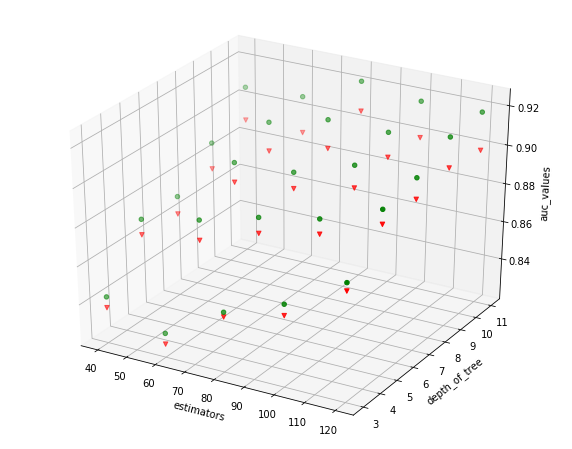

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(estimatorsy, depthsy,cvscores, marker='o',color='g')
ax.scatter(estimatorsy, depthsy,cvscores1, marker='v',color='r')

ax.set_xlabel('estimators')
ax.set_ylabel('depth_of_tree')
ax.set_zlabel('auc_values')

plt.show()

for training data


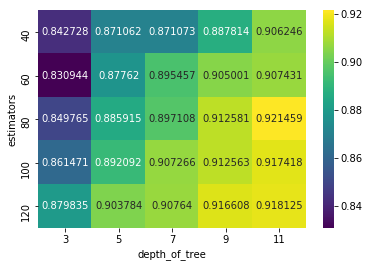

In [0]:
print('for training data')
dat=pd.DataFrame(cvscores,columns=['a'])
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

for cv data


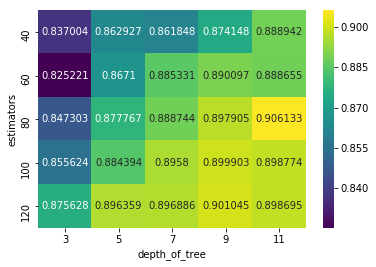

In [0]:
print('for cv data')
dat['a']=pd.DataFrame(cvscores1)
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

0.9042088258714023


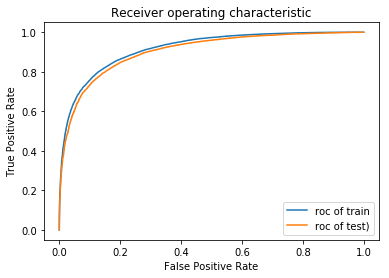

In [0]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
knne=RandomForestClassifier(n_estimators=100,max_depth=9)
knne.fit(xtrainonehotencoding,ytrain)
predictrain=knne.predict_proba(xtrainonehotencoding)[:,1]
predictra=knne.predict(xtrainonehotencoding)
fpr, tpr, thresh = metrics.roc_curve(ytrain, predictrain)
auc = metrics.roc_auc_score(ytrain, predictrain)
plt.plot(fpr,tpr,label="roc of train")
plt.legend()
predic=knne.predict_proba(xtestonehotencoding)[:,1]
predictra1=knne.predict(xtestonehotencoding)
fpr, tpr, thresh = metrics.roc_curve(ytest, predic)
auc = metrics.roc_auc_score(ytest, predic)
plt.plot(fpr,tpr,label="roc of test)")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print(roc_auc_score(ytest, predic))

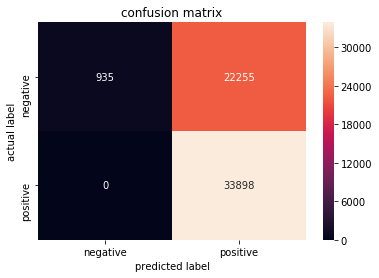

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest=confusion_matrix(ytrain,predictra)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


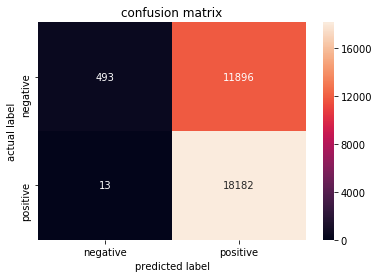

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest1=confusion_matrix(ytest,predictra1)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest1,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


### [5.1.2] Wordcloud of top 20 important features from<font color='red'> SET 1</font>

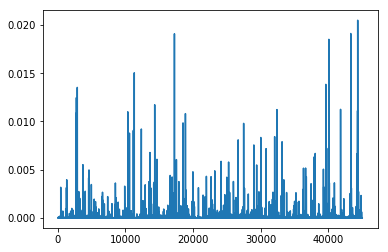

In [0]:
plt.plot(knnx.feature_importances_)

In [0]:
p=knnx.feature_importances_
s=count_vect.get_feature_names()
print(s)
x=np.argsort(p)
print(x[:3])

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaagghh', 'aaaaaah', 'aaaaaahhhhhyaaaaaa', 'aaaaah', 'aaaaahhhhhhhhhhhhhhhh', 'aaaannnnddd', 'aaah', 'aadults', 'aafco', 'aafter', 'aah', 'aahhhs', 'aahing', 'aahs', 'aalmost', 'aamazon', 'aany', 'aap', 'aasanfood', 'aback', 'abandon', 'abandoned', 'abandoning', 'abated', 'abb', 'abba', 'abbazabba', 'abbey', 'abbott', 'abbreviating', 'abby', 'abc', 'abcessed', 'abd', 'abdomen', 'abdominal', 'abe', 'abeja', 'abejas', 'aber', 'aberdeen', 'aberfoyle', 'abernook', 'aberration', 'aberrations', 'abetter', 'abhor', 'abhorrent', 'abide', 'abilities', 'ability', 'abit', 'able', 'abletate', 'ablity', 'ablution', 'abnd', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abode', 'abolutely', 'abominable', 'abominably', 'abomination', 'abominations', 'aboout', 'abortions', 'aboslutely', 'abosrb', 'abosultely', 'abot', 'abound', 'abounds', 'abour', 'aboutavailability', 'abouthi

In [0]:
c=[s[i] for i in x[:10]]
print(c)
y=np.argsort(p)
y=y[::-1]
d=[s[i] for i in y[:10]]

['aa', 'perked', 'perks', 'perky', 'perlite', 'perma', 'permalink', 'permanant', 'perk', 'permanent']


In [0]:
print(d)

['would', 'waste', 'great', 'thought', 'disgusting', 'terrible', 'bad', 'awful', 'favorite', 'unfortunately']


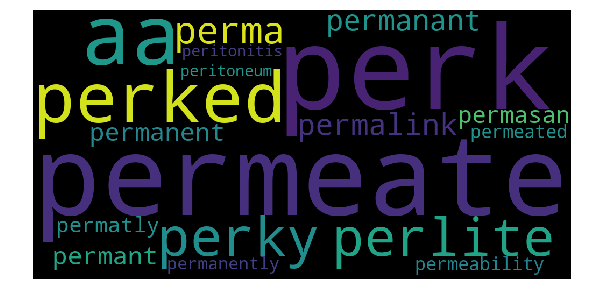

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(c))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

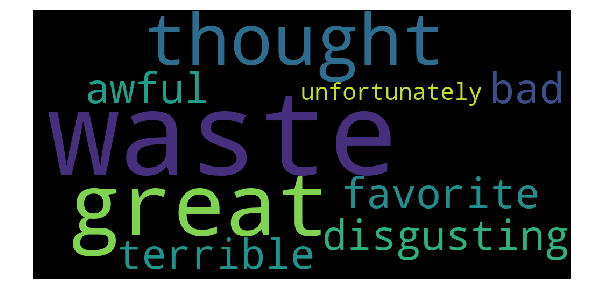

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(d))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### [5.1.3] Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [0]:
#with hyper parameter tuning
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
cvscores=[]
cvscores1=[]
estimators=[i for i in [40,60,80,100,120]]
depth=[i for i in [3,5,7,9,11]]
for i in estimators:
  for j in depth:
    knnx=RandomForestClassifier(n_estimators=i,max_depth=j)
    knnx.fit(xtraintfidfencoding,ytrain)
    predict1=knnx.predict_proba(xtraintfidfencoding)[:,1]
    predix=knnx.predict(xtraintfidfencoding)
    cvscores.append(roc_auc_score(ytrain,predict1))
    predict2=knnx.predict_proba(xcvtfidfencoding)[:,1]
    cvscores1.append(roc_auc_score(ycv,predict2))
optimal_k=np.argmax(cvscores1)
print(cvscores)
print(cvscores1)

[0.8388691866381174, 0.8568156095509216, 0.8645396472755404, 0.892086300628797, 0.9064092430755981, 0.8511056487067675, 0.8726631267365752, 0.8850524781609623, 0.894810935100917, 0.9138949786986202, 0.860561705027316, 0.883864078601632, 0.8999783798291355, 0.9083666938211586, 0.9190435414759612, 0.8690892484418733, 0.8880052346624634, 0.9005659229673904, 0.9106322976742927, 0.9192601120969381, 0.8799469744494626, 0.8940479398014453, 0.8990213131085923, 0.9126994006141399, 0.9207055646812593]
[0.8314051930850569, 0.849048272838471, 0.8518802881398055, 0.8761618870304784, 0.8866101300847329, 0.8425107415771061, 0.8625724395571359, 0.8729686706352241, 0.8820564652153962, 0.8938366258031905, 0.850854329420468, 0.8747419743926068, 0.8879189345919141, 0.891418028021534, 0.8980099019844121, 0.8643625695159279, 0.8790164020093959, 0.8884665119337636, 0.8953527421965065, 0.8976608860861669, 0.8724121997361292, 0.8849375688637338, 0.8863399806165432, 0.8981982409484236, 0.8993122049945725]


In [0]:
depthsy=depth*5
estimators2=[[i]*5 for i in estimators]
estimatorsy=np.array(estimators2).flatten()


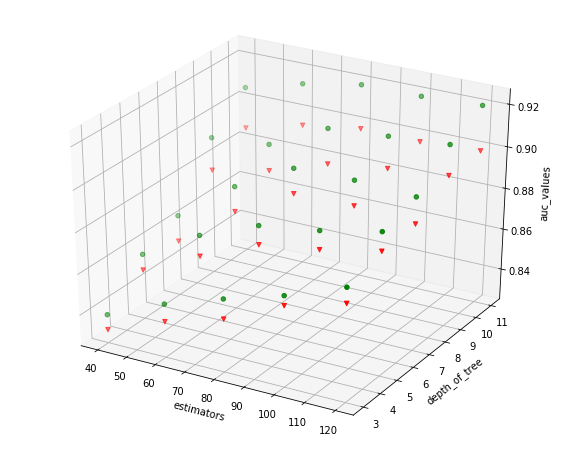

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(estimatorsy, depthsy,cvscores, marker='o',color='g')
ax.scatter(estimatorsy, depthsy,cvscores1, marker='v',color='r')

ax.set_xlabel('estimators')
ax.set_ylabel('depth_of_tree')
ax.set_zlabel('auc_values')

plt.show()

for training data


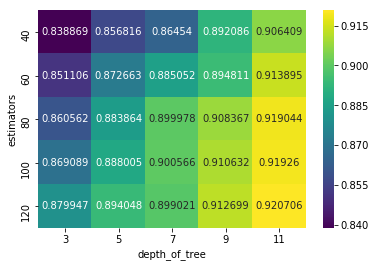

In [0]:
print('for training data')
dat=pd.DataFrame(cvscores,columns=['a'])
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

0.9018026788516819


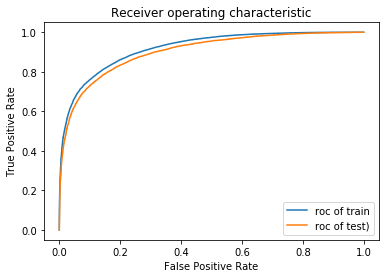

In [0]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
knne=RandomForestClassifier(n_estimators=120,max_depth=11)
knne.fit(xtraintfidfencoding,ytrain)
predictrain=knne.predict_proba(xtraintfidfencoding)[:,1]
predictra=knne.predict(xtraintfidfencoding)
fpr, tpr, thresh = metrics.roc_curve(ytrain, predictrain)
auc = metrics.roc_auc_score(ytrain, predictrain)
plt.plot(fpr,tpr,label="roc of train")
plt.legend()
predic=knne.predict_proba(xtesttfidfencoding)[:,1]
predictra1=knne.predict(xtesttfidfencoding)
fpr, tpr, thresh = metrics.roc_curve(ytest, predic)
auc = metrics.roc_auc_score(ytest, predic)
plt.plot(fpr,tpr,label="roc of test)")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print(roc_auc_score(ytest, predic))

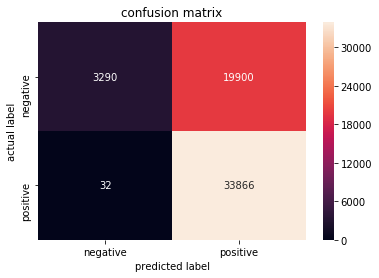

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest=confusion_matrix(ytrain,predictra)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


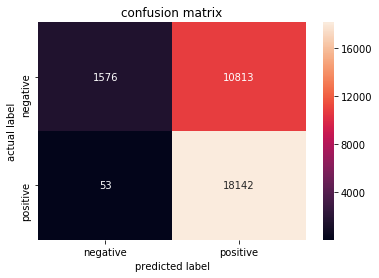

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest1=confusion_matrix(ytest,predictra1)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest1,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


### [5.1.4] Wordcloud of top 20 important features from<font color='red'> SET 2</font>

In [0]:
p=knnx.feature_importances_
s=tfidf.get_feature_names()
print(s)
x=np.argsort(p)
print(x[:3])

['aa', 'aaa', 'aaah', 'aafco', 'aah', 'aback', 'abandon', 'abandoned', 'abbey', 'abbott', 'abby', 'abc', 'abd', 'abdomen', 'abdominal', 'aberration', 'abhor', 'abilities', 'ability', 'abit', 'able', 'abnormal', 'abnormally', 'abomination', 'abominations', 'aboout', 'abound', 'abounds', 'abrasive', 'abroad', 'abruptly', 'abs', 'absence', 'absent', 'absinthe', 'absolut', 'absolute', 'absolutely', 'absolutley', 'absolutly', 'absorb', 'absorbed', 'absorbent', 'absorber', 'absorbing', 'absorbs', 'absorption', 'absoutely', 'absurd', 'absurdly', 'abt', 'abuelita', 'abundance', 'abundant', 'abundent', 'abuse', 'abused', 'abusing', 'abusive', 'abv', 'abysmal', 'ac', 'acacia', 'academy', 'acai', 'acana', 'accelerade', 'accelerate', 'accelerated', 'accent', 'accented', 'accents', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessible', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'accident

In [0]:
print(p)

[0. 0. 0. ... 0. 0. 0.]


In [0]:
print(x[:20])

[    0 14679 14678 14677 14676 14675 14672 14671 14680 14670 14668 14667
 14666 14665 14664 14663 14662 14669 14661 14681]


In [0]:
print(s[0])

aa


In [0]:
c=[s[i] for i in x[:20]]
print(c)
y=np.argsort(p)
y=y[::-1]
d=[s[i] for i in y[:10]]
print(d)

['aa', 'peer', 'peeps', 'peep', 'peels', 'peeling', 'peeking', 'peek', 'peers', 'peeing', 'pee', 'pedigree', 'pediatricians', 'pediatrician', 'pediatric', 'pedialyte', 'pedestrian', 'peed', 'peddling', 'pees']
['best', 'disappointed', 'love', 'would', 'stale', 'great', 'find', 'money', 'bad', 'loves']


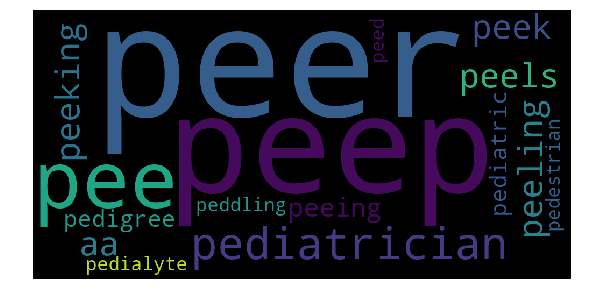

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(c))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

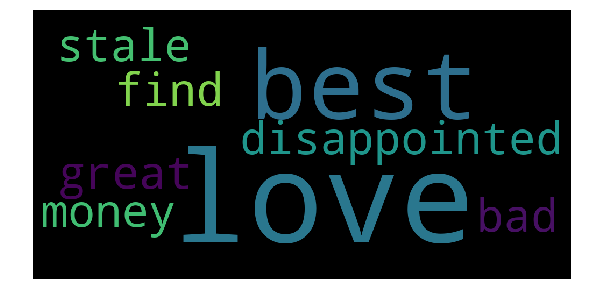

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(d))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### [5.1.5] Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [0]:

#with hyper parameter tuning
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
cvscores=[]
cvscores1=[]
estimators=[i for i in [40,60,80,100,120]]
depth=[i for i in [3,5,7,9,11]]
for i in estimators:
  for j in depth:
    knnx=RandomForestClassifier(n_estimators=i,max_depth=j)
    knnx.fit(sent_vectors,ytrain)
    predict1=knnx.predict_proba(sent_vectors)[:,1]
    cvscores.append(roc_auc_score(ytrain,predict1))
    predict2=knnx.predict_proba(sent_vectorscv)[:,1]
    cvscores1.append(roc_auc_score(ycv,predict2))
    optimal_k=np.argmax(cvscores1)
print(cvscores)
print(cvscores1)

[0.863307449553592, 0.8868685248093925, 0.9067331271138837, 0.9356062238410943, 0.9683388203318323, 0.8638284459954706, 0.8870056889589195, 0.908040525706689, 0.9369414498727902, 0.9698392898300208, 0.8710286135783504, 0.8871293051210551, 0.9094769291259109, 0.9371128567194621, 0.9697385525930708, 0.8673256763924934, 0.8887949201331514, 0.9099108590769899, 0.9376168660205307, 0.9700202400571066, 0.8695071039921377, 0.8895823787726724, 0.9088344924686038, 0.9386022524871115, 0.9701865304713573]
[0.8601859199164407, 0.8797932900134634, 0.8907766696519033, 0.9005260119989014, 0.9063162084447005, 0.8610335679242471, 0.8801697430469351, 0.8932716702460338, 0.9022589880742917, 0.9077554313465221, 0.8669146626585823, 0.8813303011550666, 0.894963695068177, 0.901857653525492, 0.9078644438688961, 0.8653205896358942, 0.8818505640314449, 0.8951029456851853, 0.9027650212590776, 0.9078282154012204, 0.865478363385924, 0.8827332751442536, 0.8943781514371211, 0.9040833326722797, 0.9088146846818923]


In [0]:
depthsy=depth*5
estimators2=[[i]*5 for i in estimators]
estimatorsy=np.array(estimators2).flatten()


for training data


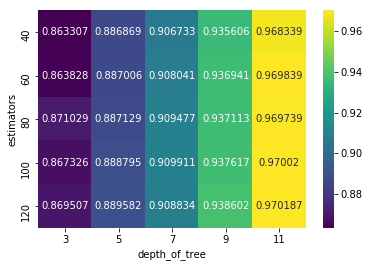

In [0]:
print('for training data')
dat=pd.DataFrame(cvscores,columns=['a'])
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

for cv data


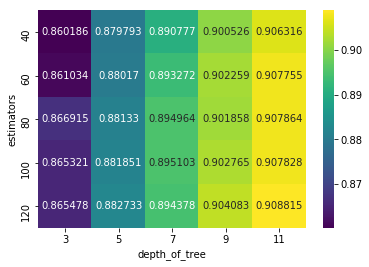

In [0]:
print('for cv data')
dat['a']=pd.DataFrame(cvscores1)
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

0.9123049458526699


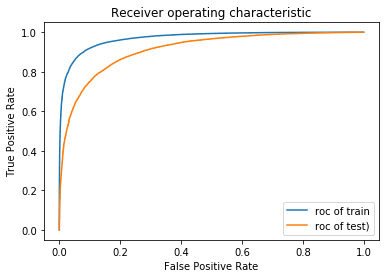

In [0]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
knne=RandomForestClassifier(n_estimators=120,max_depth=11)
knne.fit(sent_vectors,ytrain)
predictrain=knne.predict_proba(sent_vectors)[:,1]
predictra=knne.predict(sent_vectors)
fpr, tpr, thresh = metrics.roc_curve(ytrain, predictrain)
auc = metrics.roc_auc_score(ytrain, predictrain)
plt.plot(fpr,tpr,label="roc of train")
plt.legend()
predic=knne.predict_proba(sent_vectorstest)[:,1]
predictra1=knne.predict(sent_vectorstest)
fpr, tpr, thresh = metrics.roc_curve(ytest, predic)
auc = metrics.roc_auc_score(ytest, predic)
plt.plot(fpr,tpr,label="roc of test)")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print(roc_auc_score(ytest, predic))

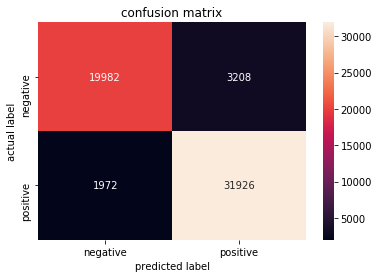

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest=confusion_matrix(ytrain,predictra)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


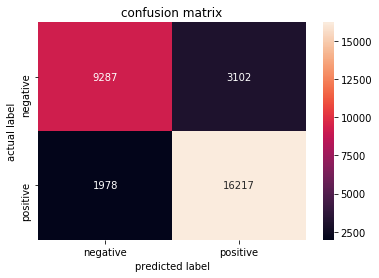

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest1=confusion_matrix(ytest,predictra1)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest1,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


### [5.1.6] Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:

#with hyper parameter tuning
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
cvscores=[]
cvscores1=[]
estimators=[i for i in [40,60,80,100,120]]
depth=[i for i in [3,5,7,9,11]]
for i in estimators:
  for j in depth:
    knnx=RandomForestClassifier(n_estimators=i,max_depth=j)
    knnx.fit( xtraintfidf_sent_vectors,ytrain)
    predict1=knnx.predict_proba( xtraintfidf_sent_vectors)[:,1]
    cvscores.append(roc_auc_score(ytrain,predict1))
    predict2=knnx.predict_proba( xcvtfidf_sent_vectors)[:,1]
    cvscores1.append(roc_auc_score(ycv,predict2))
    optimal_k=np.argmax(cvscores1)


In [0]:
depthsy=depth*5
estimators2=[[i]*5 for i in estimators]
estimatorsy=np.array(estimators2).flatten()


for training data


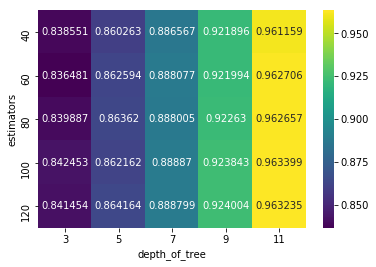

In [0]:
print('for training data')
dat=pd.DataFrame(cvscores,columns=['a'])
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

for cv data


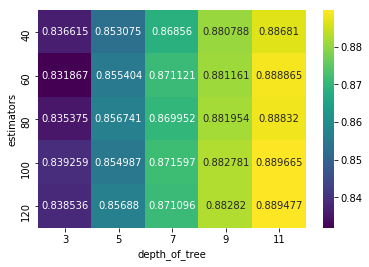

In [0]:
print('for cv data')
dat['a']=pd.DataFrame(cvscores1)
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

0.8933686907809498


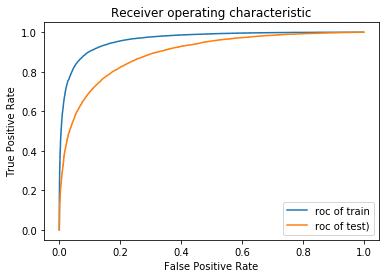

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
knne=RandomForestClassifier(n_estimators=120,max_depth=11)
knne.fit( xtraintfidf_sent_vectors,ytrain)
predictrain=knne.predict_proba( xtraintfidf_sent_vectors)[:,1]
predictra=knne.predict( xtraintfidf_sent_vectors)
fpr, tpr, thresh = metrics.roc_curve(ytrain, predictrain)
auc = metrics.roc_auc_score(ytrain, predictrain)
plt.plot(fpr,tpr,label="roc of train")
plt.legend()
predic=knne.predict_proba(xtesttfidf_sent_vectors)[:,1]
predictra1=knne.predict(xtesttfidf_sent_vectors)
fpr, tpr, thresh = metrics.roc_curve(ytest, predic)
auc = metrics.roc_auc_score(ytest, predic)
plt.plot(fpr,tpr,label="roc of test)")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print(roc_auc_score(ytest, predic))

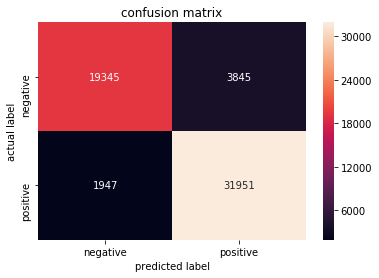

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest=confusion_matrix(ytrain,predictra)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


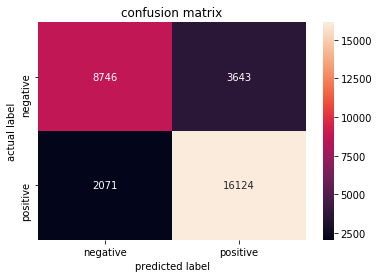

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest1=confusion_matrix(ytest,predictra1)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest1,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


## [5.2] Applying GBDT using XGBOOST

### [5.2.1] Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [0]:
#with hyper parameter tuning
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
cvscores=[]
cvscores1=[]
estimators=[i for i in [40,60,80,100,120]]
depth=[i for i in [3,5,7,9,11]]
for i in estimators:
  for j in depth:
    knnx= XGBClassifier(n_estimators=i,max_depth=j)
    knnx.fit(xtrainonehotencoding,ytrain)
    predict1=knnx.predict_proba(xtrainonehotencoding)[:,1]
    predix=knnx.predict(xtrainonehotencoding)
    cvscores.append(roc_auc_score(ytrain,predict1))
    predict2=knnx.predict_proba(xcvonehotencoding)[:,1]
    cvscores1.append(roc_auc_score(ycv,predict2))
optimal_k=np.argmax(cvscores1)
print(cvscores)
print(cvscores1)

[0.8428542628875898, 0.8722762496453671, 0.8959712190881042, 0.9136191365868909, 0.9289007778732794, 0.8598249648369303, 0.8925530936721078, 0.9145146591895006, 0.9309120503839602, 0.9442358554750063, 0.874400264309149, 0.9047559675449757, 0.9264412533442858, 0.9418517563445479, 0.9542123529607669, 0.88528107468793, 0.9141132469523834, 0.9347317674047941, 0.9492680760237233, 0.9608191454102561, 0.8925977435133698, 0.9212840332121851, 0.9413953017513337, 0.9546730672193126, 0.9659066652815916]
[0.8394036189049794, 0.8634790814946705, 0.8787497588517064, 0.887645554820173, 0.8947645918331547, 0.8560436382933432, 0.880966360436616, 0.8943501827329561, 0.9022172292451566, 0.9075191387307425, 0.869953335607358, 0.8917453415956047, 0.9040196977368166, 0.9108374067188516, 0.9158523303123589, 0.8805327228523041, 0.8996498841629502, 0.9104853956340853, 0.9170942184681279, 0.9217681201424309, 0.8868209993937661, 0.905734845807798, 0.9156019408972211, 0.9214158739406342, 0.925684893865719]


In [0]:
depthsy=depth*5
estimators2=[[i]*5 for i in estimators]
estimatorsy=np.array(estimators2).flatten()


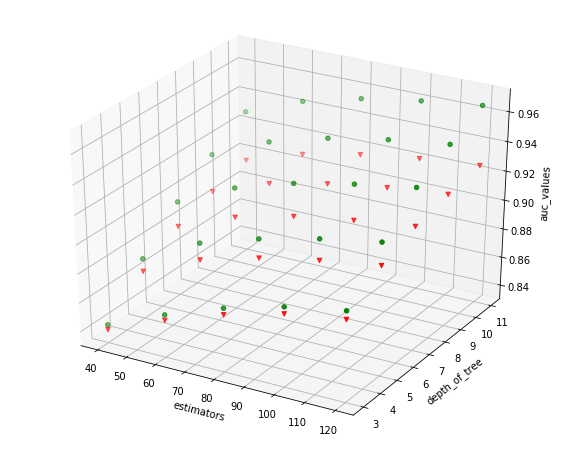

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(estimatorsy, depthsy,cvscores, marker='o',color='g')
ax.scatter(estimatorsy, depthsy,cvscores1, marker='v',color='r')

ax.set_xlabel('estimators')
ax.set_ylabel('depth_of_tree')
ax.set_zlabel('auc_values')

plt.show()

for training data


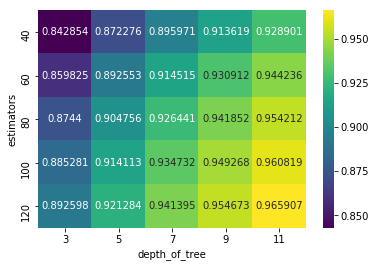

In [0]:
print('for training data')
dat=pd.DataFrame(cvscores,columns=['a'])
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

for cv data


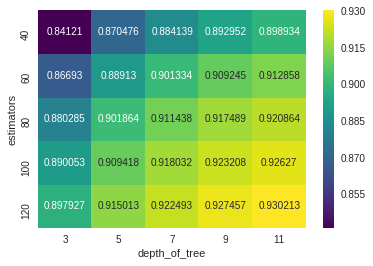

In [0]:
print('for cv data')
dat['a']=pd.DataFrame(cvscores1)
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

0.9271105321271023


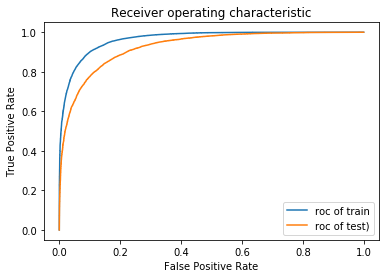

In [0]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
knne= XGBClassifier(n_estimators=120,max_depth=11)
knne.fit(xtrainonehotencoding,ytrain)
predictrain=knne.predict_proba(xtrainonehotencoding)[:,1]
predictra=knne.predict(xtrainonehotencoding)
fpr, tpr, thresh = metrics.roc_curve(ytrain, predictrain)
auc = metrics.roc_auc_score(ytrain, predictrain)
plt.plot(fpr,tpr,label="roc of train")
plt.legend()
predic=knne.predict_proba(xtestonehotencoding)[:,1]
predictra1=knne.predict(xtestonehotencoding)
fpr, tpr, thresh = metrics.roc_curve(ytest, predic)
auc = metrics.roc_auc_score(ytest, predic)
plt.plot(fpr,tpr,label="roc of test)")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print(roc_auc_score(ytest, predic))

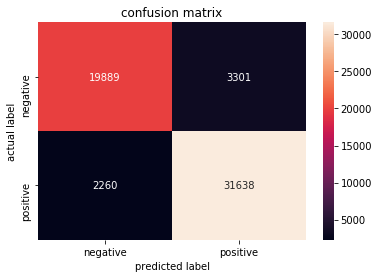

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest=confusion_matrix(ytrain,predictra)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


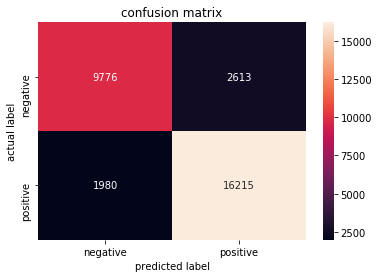

In [0]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest1=confusion_matrix(ytest,predictra1)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest1,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


### [5.2.2] Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [133]:
#with hyper parameter tuning
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
cvscores=[]
cvscores1=[]
estimators=[i for i in [40,60,80,100,120]]
depth=[i for i in [3,5,7,9,11]]
for i in estimators:
  for j in depth:
    knnx=XGBClassifier(n_estimators=i,max_depth=j)
    knnx.fit(xtraintfidfencoding,ytrain)
    predict1=knnx.predict_proba(xtraintfidfencoding)[:,1]
    predix=knnx.predict(xtraintfidfencoding)
    cvscores.append(roc_auc_score(ytrain,predict1))
    predict2=knnx.predict_proba(xcvtfidfencoding)[:,1]
    cvscores1.append(roc_auc_score(ycv,predict2))
optimal_k=np.argmax(cvscores1)
print(cvscores)
print(cvscores1)

[0.8473498273019602, 0.8774697306794951, 0.9010243219830203, 0.920905496719975, 0.9339284156403462, 0.867024485551116, 0.8976083947756823, 0.9204875743838572, 0.9368845629550295, 0.9502982974237884, 0.8792168053509893, 0.9109359036193377, 0.9318691800740221, 0.947648541978318, 0.9602191215861521, 0.8914167489150352, 0.9197324521824104, 0.940416262485043, 0.9554179928110944, 0.9666287272135254, 0.8996948630687742, 0.9263983176732592, 0.946475235385786, 0.9610234388832224, 0.9717229867315464]
[0.8414557510157261, 0.8660270652005287, 0.8798783921560707, 0.8894551790475479, 0.8955151467297919, 0.8609739913131822, 0.8839268927513868, 0.8964645186320228, 0.9039135475087287, 0.9090495359280496, 0.8729422966378756, 0.8954675713097686, 0.906055708997246, 0.9127742701497135, 0.9178266284634885, 0.8833315559848816, 0.9032900478109459, 0.9132590712443859, 0.9187540731469935, 0.9230314448379054, 0.8915172167410195, 0.9085093494389453, 0.9178359820323155, 0.9231979179180686, 0.9272654221029473]


In [0]:
depthsy=depth*5
estimators2=[[i]*5 for i in estimators]
estimatorsy=np.array(estimators2).flatten()


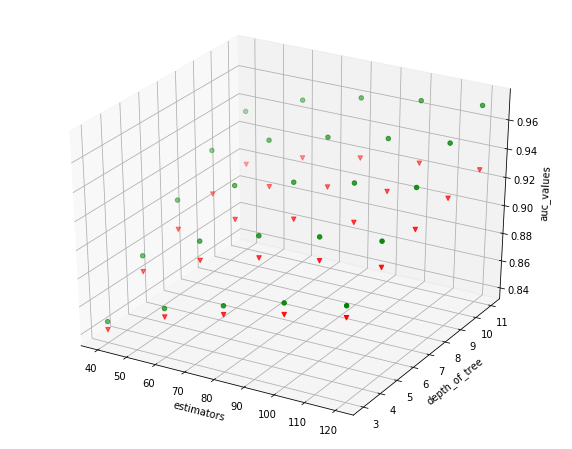

In [135]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(estimatorsy, depthsy,cvscores, marker='o',color='g')
ax.scatter(estimatorsy, depthsy,cvscores1, marker='v',color='r')

ax.set_xlabel('estimators')
ax.set_ylabel('depth_of_tree')
ax.set_zlabel('auc_values')

plt.show()

for training data


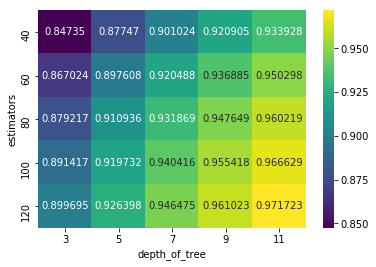

In [136]:
print('for training data')
dat=pd.DataFrame(cvscores,columns=['a'])
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

for cv data


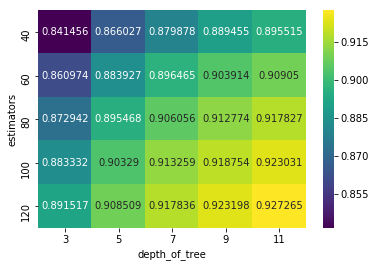

In [137]:
print('for cv data')
dat['a']=pd.DataFrame(cvscores1)
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

0.9028231148770358


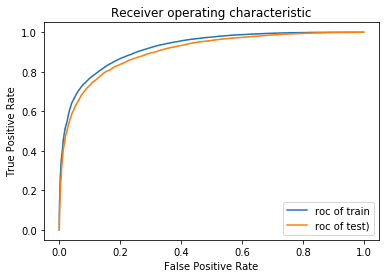

In [141]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
knne=RandomForestClassifier(n_estimators=120,max_depth=11)
knne.fit(xtraintfidfencoding,ytrain)
predictrain=knne.predict_proba(xtraintfidfencoding)[:,1]
predictra=knne.predict(xtraintfidfencoding)
fpr, tpr, thresh = metrics.roc_curve(ytrain, predictrain)
auc = metrics.roc_auc_score(ytrain, predictrain)
plt.plot(fpr,tpr,label="roc of train")
plt.legend()
predic=knne.predict_proba(xtesttfidfencoding)[:,1]
predictra1=knne.predict(xtesttfidfencoding)
fpr, tpr, thresh = metrics.roc_curve(ytest, predic)
auc = metrics.roc_auc_score(ytest, predic)
plt.plot(fpr,tpr,label="roc of test)")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print(roc_auc_score(ytest, predic))

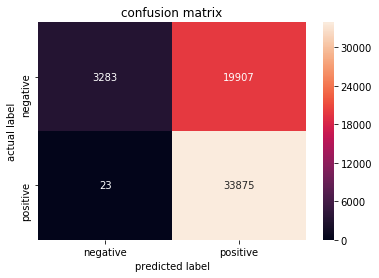

In [142]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest=confusion_matrix(ytrain,predictra)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


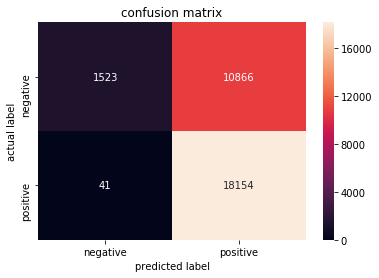

In [143]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest1=confusion_matrix(ytest,predictra1)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest1,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


### [5.2.3] Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [0]:

#with hyper parameter tuning
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
cvscores=[]
cvscores1=[]
estimators=[i for i in [40,60,80,100,120]]
depth=[i for i in [3,5,7,9,11]]
for i in estimators:
  for j in depth:
    knnx=XGBClassifier(n_estimators=i,max_depth=j)
    knnx.fit(np.array(sent_vectors),ytrain)
    predict1=knnx.predict_proba(np.array(sent_vectors))[:,1]
    cvscores.append(roc_auc_score(ytrain,predict1))
    predict2=knnx.predict_proba(np.array(sent_vectorscv))[:,1]
    cvscores1.append(roc_auc_score(ycv,predict2))
    optimal_k=np.argmax(cvscores1)
print(cvscores)
print(cvscores1)

[0.6329211730262192, 0.6957073405489024, 0.7947580209873464, 0.9135650597634164, 0.9860824807578507, 0.6483588820389077, 0.7170388025299042, 0.8232675126309859, 0.9393808769483756, 0.9919004972963688, 0.6598344675097764, 0.7332874972481048, 0.8436515803911748, 0.9572849251913211, 0.9960040166665942, 0.6676657124303942, 0.7452874019160696, 0.8617659271093854, 0.9662948895388701, 0.9977973179615451, 0.674174486145192, 0.7566907193691264, 0.8786625177513618, 0.9745602724007958, 0.9987104777539376]
[0.610029771540666, 0.620498612891299, 0.6222674187576612, 0.6175968291667461, 0.6087299117031281, 0.6175823643581227, 0.6262783312955161, 0.6259959046293357, 0.6222645769083345, 0.6106880072241037, 0.6240213406937367, 0.6280808917894924, 0.6267019201823887, 0.6215111494949319, 0.6100491022495751, 0.6275721905375331, 0.6307723582189104, 0.6269780293561809, 0.6210138258627589, 0.610250474875067, 0.6294381508499419, 0.6331299175749203, 0.6270526943471242, 0.620943014746622, 0.6100007396986233]


In [0]:
depthsy=depth*5
estimators2=[[i]*5 for i in estimators]
estimatorsy=np.array(estimators2).flatten()


for training data


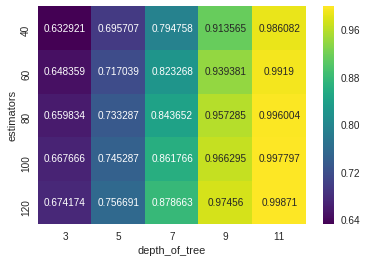

In [0]:
print('for training data')
dat=pd.DataFrame(cvscores,columns=['a'])
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

for cv data


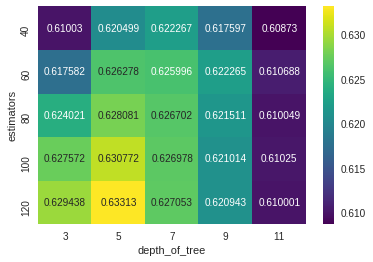

In [0]:
print('for cv data')
dat['a']=pd.DataFrame(cvscores1)
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']d.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

0.9232385739807523


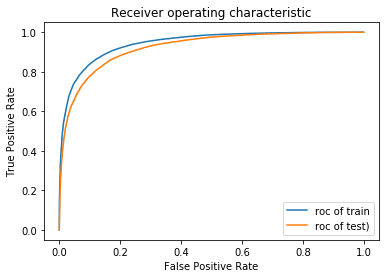

In [138]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
knne=XGBClassifier(n_estimators=120,max_depth=5)
knne.fit(np.array(sent_vectors),ytrain)
predictrain=knne.predict_proba(np.array(sent_vectors))[:,1]
predictra=knne.predict(np.array(sent_vectors))
fpr, tpr, thresh = metrics.roc_curve(ytrain, predictrain)
auc = metrics.roc_auc_score(ytrain, predictrain)
plt.plot(fpr,tpr,label="roc of train")
plt.legend()
predic=knne.predict_proba(np.array(sent_vectorstest))[:,1]
predictra1=knne.predict(np.array(sent_vectorstest))
fpr, tpr, thresh = metrics.roc_curve(ytest, predic)
auc = metrics.roc_auc_score(ytest, predic)
plt.plot(fpr,tpr,label="roc of test)")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print(roc_auc_score(ytest, predic))

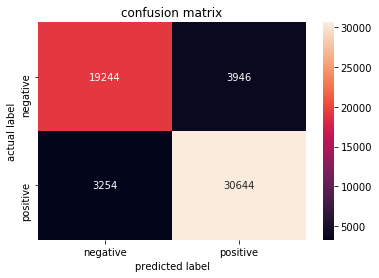

In [139]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest=confusion_matrix(ytrain,predictra)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


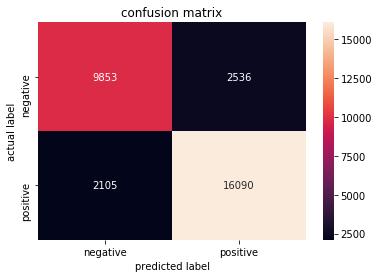

In [140]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest1=confusion_matrix(ytest,predictra1)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest1,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


### [5.2.4] Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:

#with hyper parameter tuning
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
cvscores=[]
cvscores1=[]
estimators=[i for i in [40,60,80,100,120]]
depth=[i for i in [3,5,7,9,11]]
for i in estimators:
  for j in depth:
    knnx=XGBClassifier(n_estimators=i,max_depth=j)
    knnx.fit(np.array(xtraintfidf_sent_vectors),ytrain)
    predict1=knnx.predict_proba(np.array(xtraintfidf_sent_vectors))[:,1]
    cvscores.append(roc_auc_score(ytrain,predict1))
    predict2=knnx.predict_proba(np.array(xcvtfidf_sent_vectors))[:,1]
    cvscores1.append(roc_auc_score(ycv,predict2))
    optimal_k=np.argmax(cvscores1)
print(cvscores)
print(cvscores1)

[0.8740390819619145, 0.9023736862618396, 0.9358828801041787, 0.9757373743379646, 0.9973391243919212, 0.8852154947962881, 0.9136927282367101, 0.9487827686697563, 0.9853692593647315, 0.9993068550704494, 0.892580685770372, 0.9212685179043714, 0.9577594730262877, 0.9899116184003397, 0.999769911286252, 0.8979207089599468, 0.9272850684310752, 0.9644419001366529, 0.9933901614795428, 0.9999266386023606, 0.9019306600775362, 0.9322073664618136, 0.9692304928890113, 0.9958634413501012, 0.9999707757826913]
[0.8669897365487094, 0.8857365476462005, 0.8953435215199144, 0.8999515290907643, 0.9006127804056818, 0.8779589784978729, 0.8941136754451051, 0.9014465462862017, 0.9045649852432374, 0.9053377842554677, 0.8851237815519899, 0.8985677120283337, 0.9049685585150679, 0.9067707612222585, 0.9078355858090066, 0.8892940625466912, 0.9018894556595041, 0.9071095341959525, 0.9083567584860688, 0.909063591837489, 0.8927109979078265, 0.904052399449033, 0.9082133166524274, 0.9095300538037723, 0.9101205553374306]


In [0]:
depthsy=depth*5
estimators2=[[i]*5 for i in estimators]
estimatorsy=np.array(estimators2).flatten()


for training data


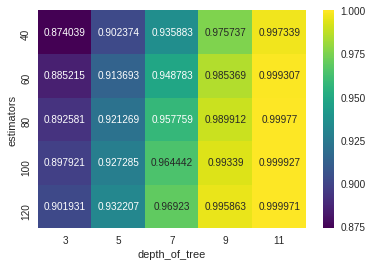

In [0]:
print('for training data')
dat=pd.DataFrame(cvscores,columns=['a'])
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

for cv data


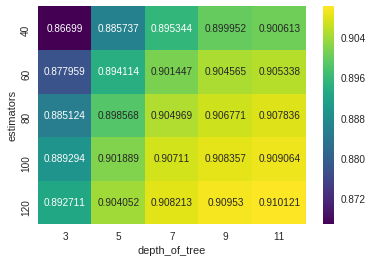

In [0]:
print('for cv data')
dat['a']=pd.DataFrame(cvscores1)
dat['depth_of_tree']=pd.DataFrame(depthsy)
dat['estimators']=pd.DataFrame(estimatorsy)
result = dat.pivot(index='estimators', columns='depth_of_tree', values='a')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')

0.9110021497631586


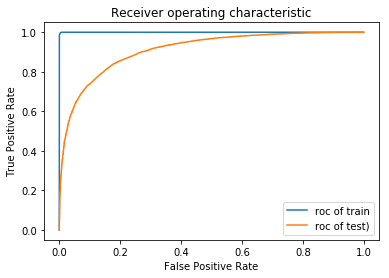

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
knne=XGBClassifier(n_estimators=120,max_depth=11)
knne.fit(np.array(xtraintfidf_sent_vectors),ytrain)
predictrain=knne.predict_proba(np.array(xtraintfidf_sent_vectors))[:,1]
predictra=knne.predict(np.array(xtraintfidf_sent_vectors))
fpr, tpr, thresh = metrics.roc_curve(ytrain, predictrain)
auc = metrics.roc_auc_score(ytrain, predictrain)
plt.plot(fpr,tpr,label="roc of train")
plt.legend()
predic=knne.predict_proba(np.array(xtesttfidf_sent_vectors))[:,1]
predictra1=knne.predict(np.array(xtesttfidf_sent_vectors))
fpr, tpr, thresh = metrics.roc_curve(ytest, predic)
auc = metrics.roc_auc_score(ytest, predic)
plt.plot(fpr,tpr,label="roc of test)")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print(roc_auc_score(ytest, predic))

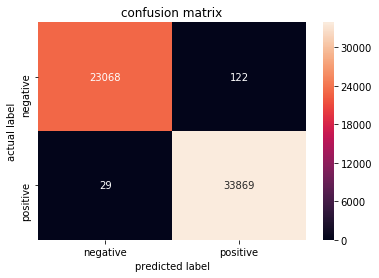

In [145]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest=confusion_matrix(ytrain,predictra)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


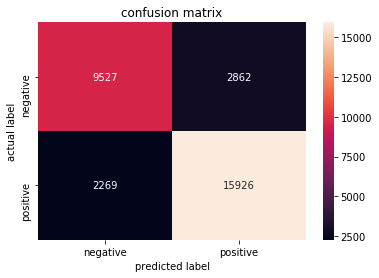

In [146]:
#plotting confusion matrix aftyer performing knn on top of svd data
from sklearn.metrics import confusion_matrix

rest1=confusion_matrix(ytest,predictra1)
import seaborn as sns

classlabel=['negative','positive']

frame=pd.DataFrame(rest1,index=classlabel,columns=classlabel)
sns.heatmap(frame,annot=True,fmt="d")
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()


# [6] Conclusions

In [148]:
import pandas as pd
print('for random forest')
data = [[100,9,0.9], [120,11, 0.9],[120,11, 0.91],[120,11,0.89]]
pd.DataFrame(data, columns=["numberof_estimators", "depth_of_tree",'auc'],index=['bow','tfidf','word2vec','averageword2vec'])

for random forest


,numberof_estimators,depth_of_tree,auc
bow,100,9,0.90
tfidf,120,11,0.90
word2vec,120,11,0.91
averageword2vec,120,11,0.89


In [149]:
print('xgboost algorithm')
data = [[120,11, 0.92], [120,11, 0.9],[120,5, 0.92],[120,11,0.91]]
pd.DataFrame(data, columns=["numberof_estimators", "depth_of_tree",'auc'],index=['bow','tfidf','word2vec','averageword2vec'])

xgboost algorithm


,numberof_estimators,depth_of_tree,auc
bow,120,11,0.92
tfidf,120,11,0.90
word2vec,120,5,0.92
averageword2vec,120,11,0.91


#DOCUMENTATION,CONCLUSIONS AND KEYTAKE AWAYS

##IN THIS RANDOM FOREST AND XG BOOST ASSIGNMENT WE HAVE EXPLORED MORE THINGS COMAPRED TO THE OTHER ASSIGNMENTS. THE DIFFERENCE BETWEEN THE RANDOM FOREST AND XGBOOST IS IN RANDOM FOREST WE WILL USE THE MULTIPLE TREES TO TRAIN THE MODEL BUT WE TAKE THE RANDOM FEATURES IN DOING IT SO. BUT IN CASE OF XG BOOST WHAT WE DO IS WE TAKE THE TREES AND REDUCE THE LOSS BUILD THE SEQUENTIAL MODELS AND TRAIN THE WEAK LEARNERS.

### IN RANDOM FOREST ANALYSIS
* WE HAVE TRAINED THE MODELS WITH ONEHOT ENCODING, TFIDF CODING,AVERAGE WORD2VEC MODEL AND APPLIED WEIGHTED WORD2VEC MODEL.
### FOR THE MODELS OF ONEHOT ENCODING AND TFIDF CODING WE HAVE PLOTTED THE SCATTERED PLOTS WITH CROSS VALIDATION DATA AND TRAIN DATA ROC SCORES.WE HAVE PLOTTED THE HEATMAP FOR THE ROC SCORES OF TRAIN AND CROSS VALIDATION DATA, WE HAVE PLOTTED HOW THE MODEL IS PERFORMING AND AUC FOR THE TEST DATA FOT THE GIVEN BEST HYPER PARAMETERS FOR CROSS VALIDATION . WE HAVE PLOTTED THE CONFUSION MATRIX FOR THE DATA AND DISPLAYED THE FEATURE IMPORTANCES AND IMPORTANT FEATURES WE HAVE PLOTTED IN THE WORD CLOUD.WE DISPLAYED THE POSITIVE FEATURES IN THE WORD CLOUD.
### THE MODELS OF RANDOM FOREST BOW,TFIDF,AVFW2VEC,TFIDFWORD2VEC PERFORMED EXTREEMELY WELL COMPARE TO ALL OTHER MODELS WE HAVE DONE WE WERE ABLE TO ACHIEVE AUC VALUE OF 0.9.
### MODELS OF XGBOOST BOW,TFIDF,WORD2VEC,TFIDFWORD2VEC PERFORMED EXTREELEY GOOD WE ARE ABLE TOA CHIEVE AUC VALUE OF 0.92FOR ALL THE ENCODING TECHNIQUES.


##IN XG BOOST ANALYSIS
 * WE HAVE TRAINED THE MODELS WITH ONEHOT ENCODING, TFIDF CODING,AVERAGE WORD2VEC MODEL AND APPLIED WEIGHTED WORD2VEC MODEL.
 ### WE ALSO PLOTTED THE CVSCORES OF TRAIN DATA AND CROSS VALIDATION DATA AND OBTAINED BEST HYPERPARAMETERS AND APPLIED FOR TEST DATA . WE HAVE PLOTTED THE ROC CURVES AND OBTAINED CONFUSION MATRIXES FOR THE TEST DATA.WE ARE ABLE TO ACHIN=VE ALL MODELS HAVING AUC OF 0.9 WHICH IS VERY NICE COMPARING TO THE OTHER MODELS.